## Clustering (Exploratory Analysis):  Tips Dataset
### Corey Solitaire
#### 10.13.2020

#### Imports

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Exploring
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve
%matplotlib inline

pd.options.display.float_format = '{:20,.2f}'.format

import wrangle_zillow

In [2]:
df = sns.load_dataset('tips')

In [3]:
df.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


In [4]:
# df summay

wrangle_zillow.df_summary(df)

The shape of the df:
(244, 7)


Columns, Non-Null Count, Data Type:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB
None


Summary statistics for the df:
                total_bill                  tip                 size
count               244.00               244.00               244.00
mean                 19.79                 3.00                 2.57
std                   8.90                 1.38                 0.95
min                   3.07                 1.00                 1.00
25% 

13.42    3
10.33    2
20.29    2
18.29    2
17.92    2
21.01    2
13.81    2
15.69    2
15.98    2
13.00    2
Name: total_bill, dtype: int64

----------------------------------------tip---------------------------------------- - 

2.00    33
3.00    23
4.00    12
5.00    10
2.50    10
3.50     9
1.50     9
1.00     4
1.25     3
3.48     3
Name: tip, dtype: int64

----------------------------------------sex---------------------------------------- - 

Male      157
Female     87
Name: sex, dtype: int64

----------------------------------------smoker---------------------------------------- - 

No     151
Yes     93
Name: smoker, dtype: int64

----------------------------------------day---------------------------------------- - 

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

----------------------------------------time---------------------------------------- - 

Dinner    176
Lunch      68
Name: time, dtype: int64

----------------------------------------size---------------------------------------- - 

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

In [5]:
# Outliers info()

def get_upper_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

In [6]:
def add_upper_outlier_columns(df, k):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    # outlier_cols = {col + '_outliers': get_upper_outliers(df[col], k)
    #                 for col in df.select_dtypes('number')}
    # return df.assign(**outlier_cols)

    for col in df.select_dtypes('number'):
        df[col + '_outliers'] = get_upper_outliers(df[col], k)

    return df

In [7]:
add_upper_outlier_columns(df, k=1.5)

,total_bill,tip,sex,smoker,day,time,size,total_bill_outliers,tip_outliers,size_outliers
0,16.99,1.01,Female,No,Sun,Dinner,2,0.00,0.00,0.00
1,10.34,1.66,Male,No,Sun,Dinner,3,0.00,0.00,0.00
2,21.01,3.50,Male,No,Sun,Dinner,3,0.00,0.00,0.00
3,23.68,3.31,Male,No,Sun,Dinner,2,0.00,0.00,0.00
4,24.59,3.61,Female,No,Sun,Dinner,4,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.00,0.01,0.00
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.00,0.00,0.00
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.00,0.00,0.00
242,17.82,1.75,Male,No,Sat,Dinner,2,0.00,0.00,0.00


In [8]:
# To Print Outliers
outlier_cols = [col for col in df if col.endswith('_outliers')]
for col in outlier_cols:
    print('~~~\n' + col)
    data = df[col][df[col] > 0]
    print(data.describe())

~~~
total_bill_outliers
count                   9.00
mean                    5.27
std                     3.56
min                     0.25
25%                     2.81
50%                     5.05
75%                     7.97
max                    10.51
Name: total_bill_outliers, dtype: float64
~~~
tip_outliers
count                   9.00
mean                    1.31
std                     1.40
min                     0.01
25%                     0.59
50%                     0.79
75%                     1.67
max                     4.09
Name: tip_outliers, dtype: float64
~~~
size_outliers
count                   9.00
mean                    0.94
std                     0.53
min                     0.50
25%                     0.50
50%                     0.50
75%                     1.50
max                     1.50
Name: size_outliers, dtype: float64


In [9]:

# Return df to normal        
df.drop([x for x in df if x.endswith('_outliers')], 1, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [11]:
# def cat_variables():
#     '''
#     This function turns all categorical variables in to cat code columns
#     '''
#     for col_name in df.columns:
#         if(df[col_name].dtype == 'object'):
#             df[col_name]= df[col_name].astype('category')
#             df[col_name] = df[col_name].cat.codes
#         else:
#             df[col_name]= df[col_name].astype('category')
#             df[col_name] = df[col_name].cat.codes
#     return df

df["sex"] = df["sex"].cat.codes
df["smoker"] = df["smoker"].cat.codes
df["day"] = df["day"].cat.codes
df["time"] = df["time"].cat.codes

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int8   
 3   smoker      244 non-null    int8   
 4   day         244 non-null    int8   
 5   time        244 non-null    int8   
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), int8(4)
memory usage: 6.8 KB


In [13]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,1,3,1,2
1,10.34,1.66,0,1,3,1,3
2,21.01,3.50,0,1,3,1,3
3,23.68,3.31,0,1,3,1,2
4,24.59,3.61,1,1,3,1,4


In [14]:
# Split Dataset before Explore

train, validate, test = wrangle_zillow.split_df(df)
train.shape, validate.shape, test.shape

((136, 7), (59, 7), (49, 7))

In [15]:
train.head()

,total_bill,tip,sex,smoker,day,time,size
18,16.97,3.50,1,1,3,1,3
172,7.25,5.15,0,0,3,1,2
118,12.43,1.80,1,1,0,0,2
28,21.70,4.30,0,1,2,1,2
237,32.83,1.17,0,0,2,1,2


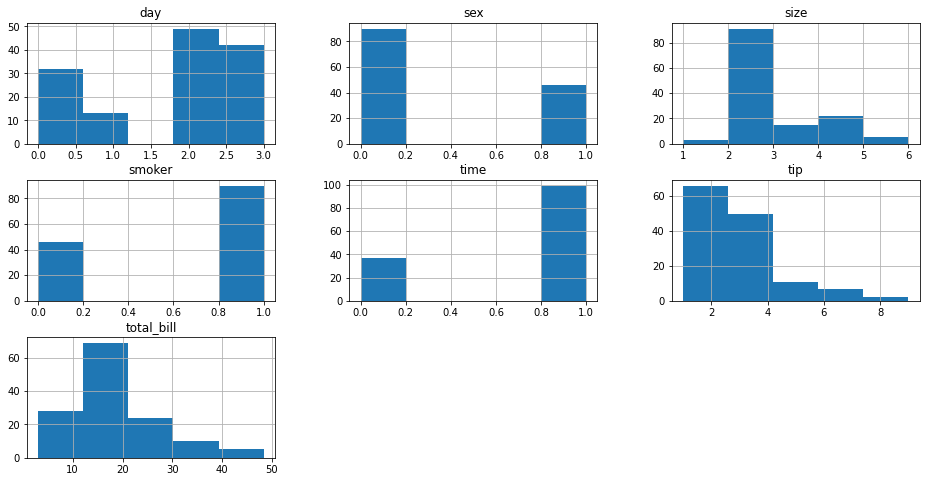

In [16]:
train.hist(figsize=(16, 8), bins=5, log=False)
plt.show()

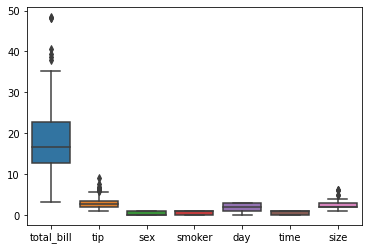

In [17]:
sns.boxplot(data=train)
plt.show()

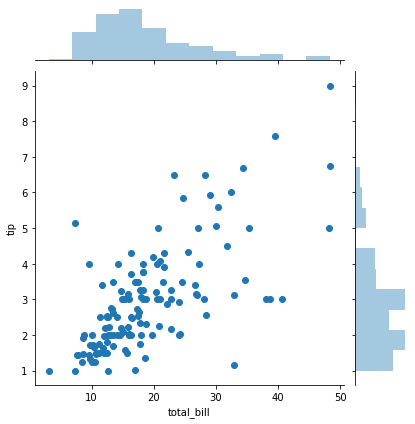

In [18]:
sns.jointplot(x="total_bill", y="tip", data=train)
plt.show()

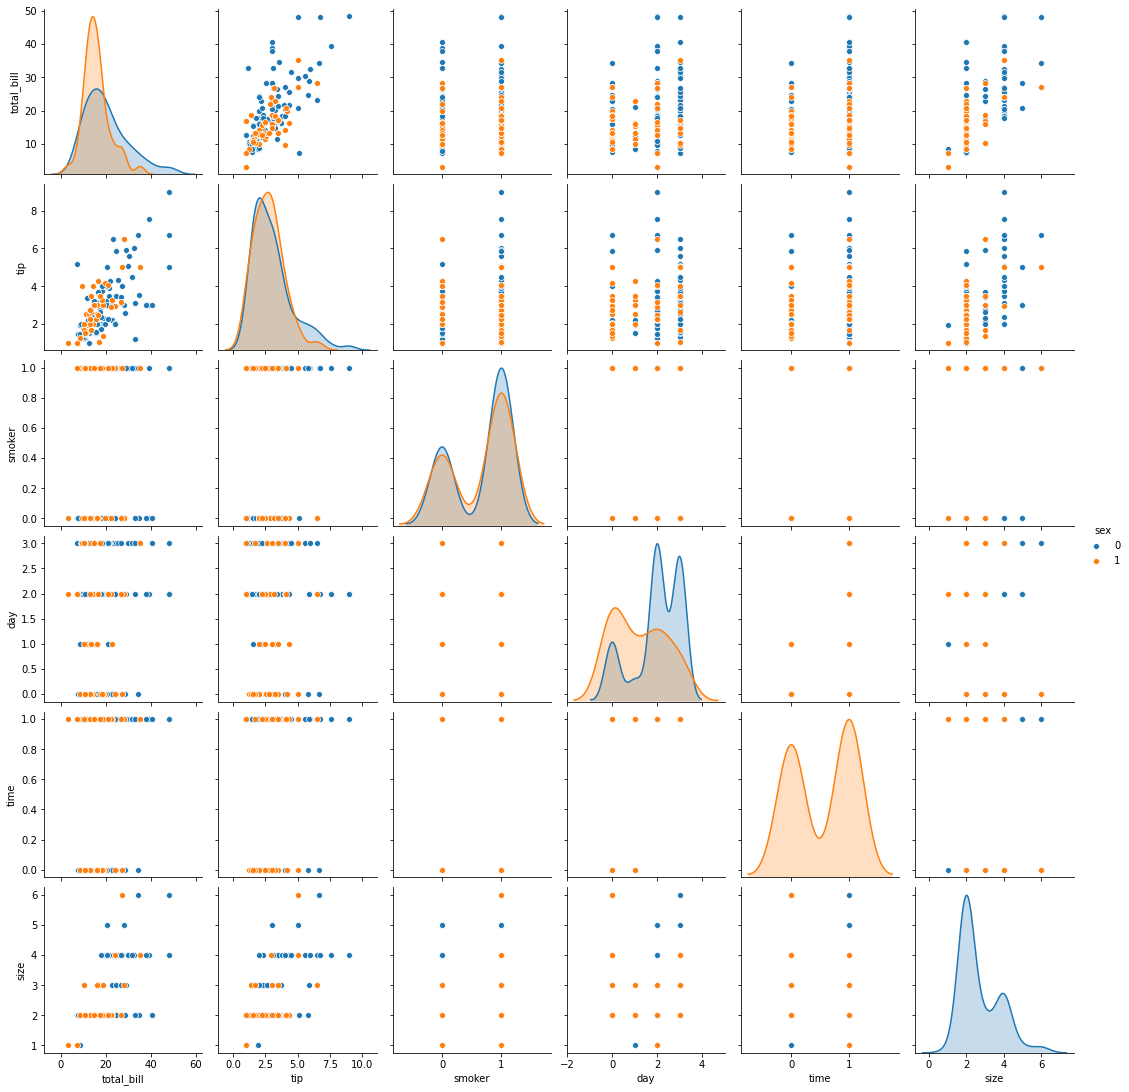

In [19]:
sns.pairplot(train, hue='sex')
plt.show()

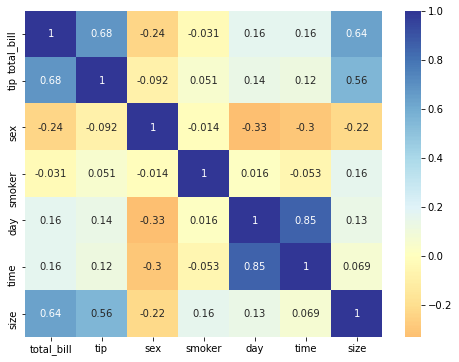

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(), cmap='RdYlBu', annot=True, center=0)
plt.show()

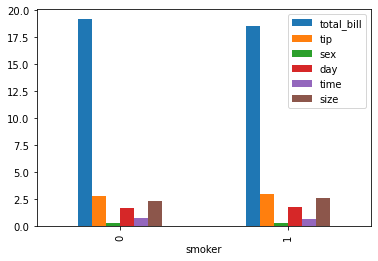

In [21]:
train.groupby('smoker').mean().plot.bar()
plt.show()

### T-Test (2 Sample)

Hypothesis: Is the total bill amount different for parties of 2 vs 4?   
Null =  The average size of the tip left by parties of 2 and parties of 4 is the same  
alternate =  The average size of the tip left by parties of 2 and parties of 4 is ***not*** the same   
alpha = 0.05   

In [22]:
parties_of_2 = train[train['size'] == 2]
parties_of_4 = train[train['size'] == 4]
test_results = stats.ttest_ind(parties_of_2.tip, parties_of_4.tip)
test_results

Ttest_indResult(statistic=-6.6929925534889625, pvalue=9.298806056310469e-10)

***Reject Null: The average tip left by parties of 2 is different than tips left by parties of 4***

***

#### Chi Squared Test for Independence

Hypothesis: sex is indep of whether or not someone is a smoker   
Null - sex is indep of whether or not someone is a smoker   
Alternate - sex is **dependent upon** whether or not someone is a smoker   
alpha = 0.05   

In [31]:
contingency_table = pd.crosstab(train.sex, train.smoker)
chi2, p, degf, expected = stats.chi2_contingency(contingency_table)

print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

---
Expected

[[30.44117647 59.55882353]
 [15.55882353 30.44117647]]
---

chi^2 = 0.0005
p     = 0.9820


***We Fail to Reject the Null: Sex and Smoking Status appear to be independent***